**Question 1**

Create 1000 draws from a normal distribution of mean of 1.5 and standard
deviation of 0.5. Plot the pdf. Calculate the sample mean, variance,
skewness, kurtosis as well as standard deviation using MAD and σG of
these samples.

In [1]:
import numpy as np

mu = 1.5
sigma = 0.5
draws = np.random.normal(mu, sigma, 1000)

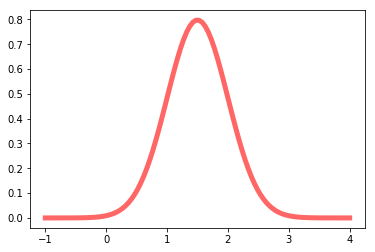

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-1,4, 100)
plt.plot(x,norm.pdf(x,mu,sigma),'r-', lw=5, alpha=0.6, label='Gaussian pdf')

In [3]:
#Calculating mean, standard deviation and variance
mu_est = np.mean(draws) 
sigma_est = np.std(draws)
print("Sample Mean = ",mu_est)
print("Sample Standard Deviation = ",sigma_est)
print("Sample Variance = ",sigma_est**2)

#Calculating skewness
from scipy.stats import skew
skewness = skew(draws)
print("Skewness = ",skewness)

#Calculating kurtosis
from scipy.stats import kurtosis
kurtosis = kurtosis(draws)
print("Kurtosis = ",kurtosis)

#Calculating MAD
median=np.median(draws)
devn=[]
for xi in draws:
    devn.append(abs(xi-median))
mad=np.median(devn)
print("MAD = ",mad)

Sample Mean =  1.5176768860047096
Sample Standard Deviation =  0.5140836408687753
Sample Variance =  0.264281989808896
Skewness =  0.08607621994565137
Kurtosis =  0.26092726949891354
MAD =  0.337526475163888


**Question 2**

Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top of
a Gaussian distribution with μ=0 and σ=1.5. Use two different line styles
to distinguish between the Gaussan and Cauchy distribution on the plot
and also indicate these in the legends.

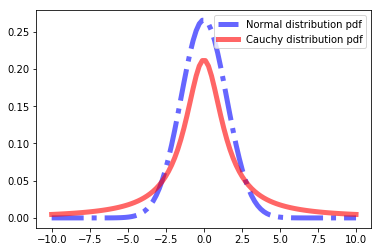

In [4]:
from scipy.stats import norm
from scipy.stats import cauchy

x = np.linspace(-10,10, 100)
plt.plot(x, norm.pdf(x,0,1.5),'b-.', lw=5, alpha=0.6, label='Normal distribution pdf')
plt.plot(x, cauchy.pdf(x,0,1.5),'r-', lw=5, alpha=0.6, label='Cauchy distribution pdf')
plt.legend()

**Question 3**

Plot Poisson distribution with mean of 5, superposed on top of a Gaussian
distribution with mean of 5 and standard deviation of square root of 5.
Use two different line styles for the two distributions and make sure the
plot contains legends for both of them.

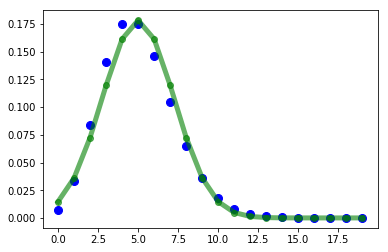

In [5]:
from scipy.stats import poisson

x = np.arange(0,20)
plt.plot(x, poisson.pmf(x, 5), 'bo', ms=8, label='Poisson distribution pmf')
plt.plot(x, norm.pdf(x,5,np.sqrt(5)),'g-o', lw=5, alpha=0.6, label='Normal distribution pdf')

**Question 4**

The following were the measurements of mean lifetime of K meson (as of
1990) (in units of 10−10 s) :
0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958±
0.00045. Calculate the weighted mean lifetime and uncertainty of the
mean.

In [6]:
x_=[0.8920,0.881,0.8913,0.9837,0.8958]
sigma_=[0.00044,0.009,0.00032,0.00048,0.00045]

numerator=0
denominator=0

for i in range(5):
    factor=1/(sigma_[i]*sigma_[i])
    numerator+=factor*x_[i]
    denominator+=factor

wml=numerator/denominator
uncertainity=np.sqrt(1/denominator)

print("Weighted Mean Lifetime = ",wml)
print("Uncertainity = ±",uncertainity)

Weighted Mean Lifetime =  0.9089185199574896
Uncertainity = ± 0.00020318737026848627


**Question 5**

Download the eccentricity distribution of exoplanets from the exoplanet
catalog http://exoplanet.eu/catalog/. Look for the column titled e,
which denotes the eccentricity. Draw the histogram of this distribution.
Then redraw the same histogram after Gaussianizing the distribution using
Box-transformation either using scipy.stats.boxcox or from first principles using the equations shown in class or in arXiv:1508.00931. Note that exoplanets without eccentricity data can be ignored.

In [10]:
data = []
f = open('data.csv','r')
for line in f:
    cells = line.split( "," )
    data.append((cells[17]))
f.close()
data = data[1:len(data)]
while("" in data) : 
    data.remove("") 
while("0.0" in data) : 
    data.remove("0.0")
data = [float(x) for x in data]
print(len(data))

1275


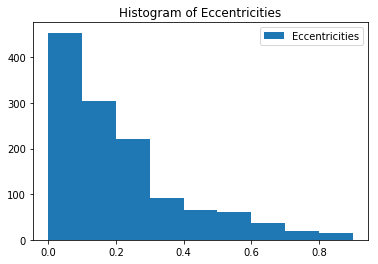

In [8]:
from scipy import stats

#fig=plt.figure()
#ax1 = fig.add_subplot(211)
plt.hist(data, bins=np.arange(10)*0.1,histtype='bar', label='Eccentricities')
plt.title('Histogram of Eccentricities')
plt.legend()

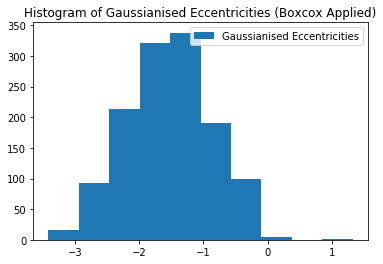

In [9]:
#ax2 = fig.add_subplot(212)
x, _ = stats.boxcox(data)
prob = plt.hist(x, histtype='bar', label='Gaussianised Eccentricities')
plt.title('Histogram of Gaussianised Eccentricities (Boxcox Applied)')
plt.legend()